In [1]:
import btlflt as bf

ic| ret1: 127.0
    th1: array([[255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255],
                ...,
                [255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
ic| ret2: 120.0
    th2: array([[255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255],
                ...,
                [255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
ic| ret3: 120.0
    th3: array([[255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255],
                [255, 255, 255, ..., 255, 255, 255],
                ...,
                [255, 255, 255, ..., 255, 255, 255],
             

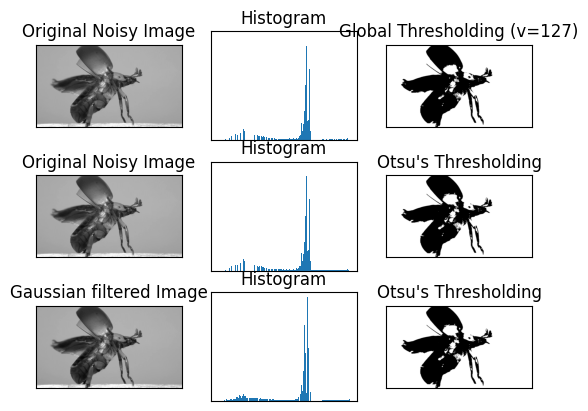

In [3]:
imagepath = '/home/aubrey/Desktop/beetles-in-flight/code/frames/0001.png'
img = bf.cv2.imread(imagepath, bf.cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# global thresholding
ret1,th1 = bf.cv2.threshold(img,127,255,bf.cv2.THRESH_BINARY)
bf.ic(ret1,th1)

# Otsu's thresholding
ret2,th2 = bf.cv2.threshold(img,0,255,bf.cv2.THRESH_BINARY+bf.cv2.THRESH_OTSU)
bf.ic(ret2,th2)

# Otsu's thresholding after Gaussian filtering
blur = bf.cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = bf.cv2.threshold(blur,0,255,bf.cv2.THRESH_BINARY+bf.cv2.THRESH_OTSU)
bf.ic(ret3,th3)

# plot all the images and their histograms
images = [img, th1, th1,
          img, th2, th2,
          blur, th3, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    bf.plt.subplot(3,3,i*3+1),bf.plt.imshow(images[i*3],'gray')
    bf.plt.title(titles[i*3]), bf.plt.xticks([]), bf.plt.yticks([])
    bf.plt.subplot(3,3,i*3+2),bf.plt.hist(images[i*3].ravel(),256)
    bf.plt.title(titles[i*3+1]), bf.plt.xticks([]), bf.plt.yticks([])
    bf.plt.subplot(3,3,i*3+3),bf.plt.imshow(images[i*3+2],'gray')
    bf.plt.title(titles[i*3+2]), bf.plt.xticks([]), bf.plt.yticks([])
bf.plt.show()
